In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score,recall_score

# Create Data Frame using pandas using read_csv 
df = pd.read_csv("chrome_reviews.csv")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sowjanya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [177]:
# To get first n rows for the object based on position.
df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [178]:
# Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7204 non-null   int64 
 1   Review URL       7204 non-null   object
 2   Text             7203 non-null   object
 3   Star             7204 non-null   int64 
 4   Thumbs Up        7204 non-null   int64 
 5   User Name        7204 non-null   object
 6   Developer Reply  95 non-null     object
 7   Version          7119 non-null   object
 8   Review Date      7204 non-null   object
 9   App ID           7204 non-null   object
dtypes: int64(3), object(7)
memory usage: 562.9+ KB


In [179]:
# Compute Statistical summary of the data frame.
df.describe()

,ID,Star,Thumbs Up
count,7204.000000,7204.000000,7204.000000
mean,252654.665047,3.592726,1.216685
std,204647.596623,1.728362,41.382835
min,3886.000000,1.000000,0.000000
25%,83254.750000,1.000000,0.000000
50%,181866.500000,5.000000,0.000000
75%,419485.250000,5.000000,0.000000
max,684991.000000,5.000000,2389.000000


In [180]:
# Check the shape of the Data Frame
print(df.shape)

(7204, 10)


In [181]:
# Checking for Duplicates 

df.duplicated().sum()  

0

<AxesSubplot:xlabel='Star', ylabel='Thumbs Up'>

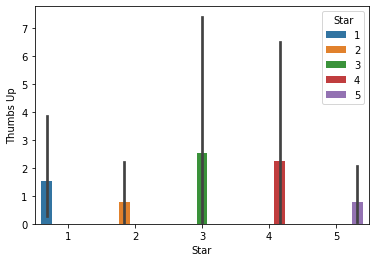

In [182]:
sns.barplot(x = 'Star',y = 'Thumbs Up',hue = 'Star',data = df)

<AxesSubplot:>

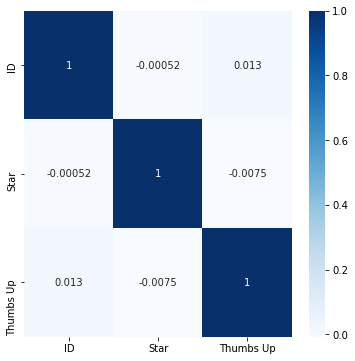

In [183]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [184]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
df = pd.read_csv('chrome_reviews.csv')

review = df['Text']
review = str(review).encode('utf-8')
polarity = df['Text'].apply(lambda review:round(sent.polarity_scores(str(review))['compound'], 2) * 100)  
df['sentiment_score'] = polarity
#sentiment_categ(df['sentiment_score'])
df.loc[df['sentiment_score'] > 50, "sentiment_type"] = "Positive"
df.loc[(df['sentiment_score'] > 0) & (df['sentiment_score'] < 50), "sentiment_type"] = "Neutral"
df.loc[df['sentiment_score'] < 0, "sentiment_type"] = "Negative"
df.loc[(df['sentiment_score'] == 0.0) & (df['Star'] >= 3), "sentiment_type"] = "Positive"
df.loc[(df['sentiment_score'] == 0.0) & (df['Star'] < 3), "sentiment_type"] = "Negative"

In [185]:
df.head(5)

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID,sentiment_score,sentiment_type
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome,0.0,Positive
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome,44.0,Neutral
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome,0.0,Negative
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome,42.0,Neutral
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome,-23.0,Negative


In [186]:


filterinfDataframe = df[(df['Star'] < 3) & (df['sentiment_type'] == "Positive") ]

len(filterinfDataframe)

148

In [188]:
filterinfDataframe

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID,sentiment_score,sentiment_type
112,4097,https://play.google.com/store/apps/details?id=...,"@ s,for xzznrbx v u #z,, $7*.""7 :87 ,x' , ÷÷÷=...",2,0,Hlayiseka Hlungwani,NaN,40.0.2214.109,2020-12-21,com.android.chrome,55.0,Positive
258,5217,https://play.google.com/store/apps/details?id=...,It is the best app for browsing,1,0,Favour Nwaejikoma,NaN,56.0.2924.87,2020-12-21,com.android.chrome,64.0,Positive
277,5237,https://play.google.com/store/apps/details?id=...,Dark mode is acting up and changing screen lig...,1,0,darko vujosevic,NaN,87.0.4280.101,2020-12-21,com.android.chrome,84.0,Positive
289,5249,https://play.google.com/store/apps/details?id=...,Latest update turns my screen pink on some web...,1,1,Greg Astin,NaN,85.0.4183.101,2020-12-21,com.android.chrome,61.0,Positive
310,5842,https://play.google.com/store/apps/details?id=...,Best,1,0,Vasava Govindbhai,NaN,67.0.3396.87,2020-12-22,com.android.chrome,64.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
6764,620144,https://play.google.com/store/apps/details?id=...,This version is not getting updated on this Ho...,1,0,Ineka Bandaranayake,NaN,88.0.4324.93,2021-03-01,com.android.chrome,58.0,Positive
6904,642338,https://play.google.com/store/apps/details?id=...,I specifically remember asking Google for help...,1,0,Andreus Washington,NaN,88.0.4324.181,2021-03-02,com.android.chrome,82.0,Positive
6952,656080,https://play.google.com/store/apps/details?id=...,The app was working great until this recent up...,1,0,Pradeep Kumawat,NaN,89.0.4389.72,2021-03-03,com.android.chrome,73.0,Positive
7147,684935,https://play.google.com/store/apps/details?id=...,I'm not able to update the app for some reason...,2,0,Olutobi Odeyale,NaN,86.0.4240.198,2021-03-05,com.android.chrome,51.0,Positive
